In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Set current directory if running from Google Collab

import os
os.chdir('/content/drive/Shareddrives/Spatial_Final') 

os.getcwd()

'/content/drive/Shareddrives/Spatial_Final'

In [3]:
!pip install category_encoders

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from category_encoders import TargetEncoder, BinaryEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

     |████████████████████████████████| 86 kB 3.0 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
SEED=666
np.random.seed(SEED)
random_state=SEED

In [5]:
# Read data
full_data = pd.read_csv('./data/socal.csv',na_values='NaN')

full_data = full_data[full_data.bath<10]

y = full_data.price


In [6]:
full_data.head()

,image_id,street,citi,n_citi,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100


In [7]:
full_data.info()
full_data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15471 entries, 0 to 15473
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  15471 non-null  int64  
 1   street    15471 non-null  object 
 2   citi      15471 non-null  object 
 3   n_citi    15471 non-null  int64  
 4   bed       15471 non-null  int64  
 5   bath      15471 non-null  float64
 6   sqft      15471 non-null  int64  
 7   price     15471 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 1.1+ MB


,count,mean,std,min,25%,50%,75%,max
image_id,15471.0,7737.026760,4466.583254,0.0,3869.5,7737.0,11604.5,15473.0
n_citi,15471.0,216.605908,112.375936,0.0,119.0,223.0,315.0,414.0
bed,15471.0,3.505850,1.033167,1.0,3.0,3.0,4.0,12.0
bath,15471.0,2.449835,0.913494,0.0,2.0,2.1,3.0,8.1
sqft,15471.0,2173.710038,1024.789603,280.0,1426.0,1951.0,2737.5,17667.0
price,15471.0,703122.253700,376918.820984,195000.0,445000.0,639000.0,834950.0,2000000.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


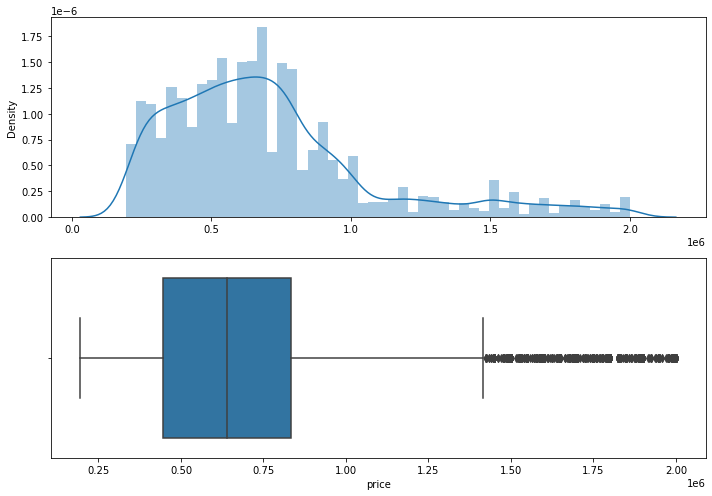

In [8]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(x=full_data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(x=full_data['price'])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  


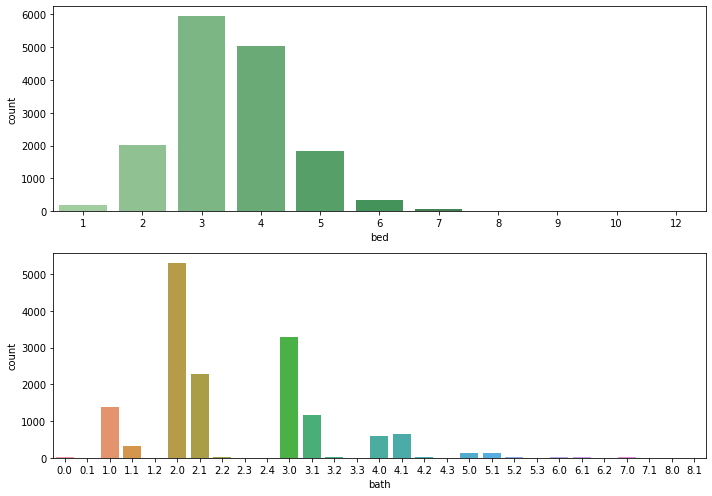

In [9]:
#visualizing bedrooms, bathrooms

fig = plt.figure(figsize=(10,7),constrained_layout=True)
fig.add_subplot(2,1,1)
sns.countplot(x=full_data['bed'], palette = 'Greens_d')
fig.add_subplot(2,1,2)
sns.countplot(x=full_data['bath'])
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


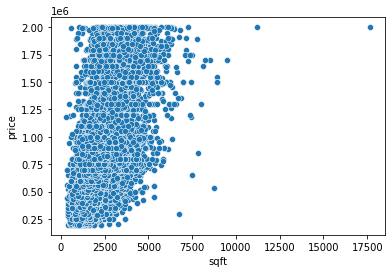

In [10]:
sns.scatterplot(full_data['sqft'], full_data['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  if __name__ == '__main__':


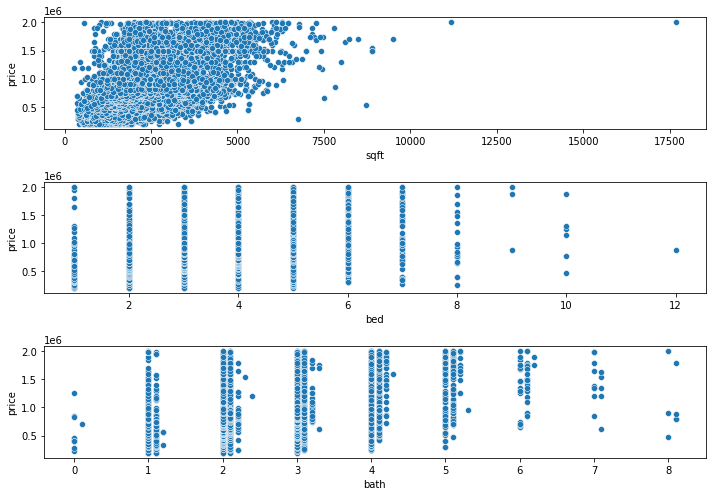

In [11]:
#visualizing square footage of homes
fig = plt.figure(figsize=(10,7),constrained_layout=True)
fig.add_subplot(3,1,1)
sns.scatterplot(full_data['sqft'], full_data['price'])
fig.add_subplot(3,1,2)
sns.scatterplot(x=full_data['bed'], y=full_data['price'])
fig.add_subplot(3,1,3)
sns.scatterplot(x=full_data['bath'], y=full_data['price'])
plt.tight_layout()


In [12]:
# check correlation
full_data.drop(['image_id','n_citi'],axis=1).corr()['price'].sort_values(ascending=False)

price    1.000000
sqft     0.583249
bath     0.503899
bed      0.348413
Name: price, dtype: float64

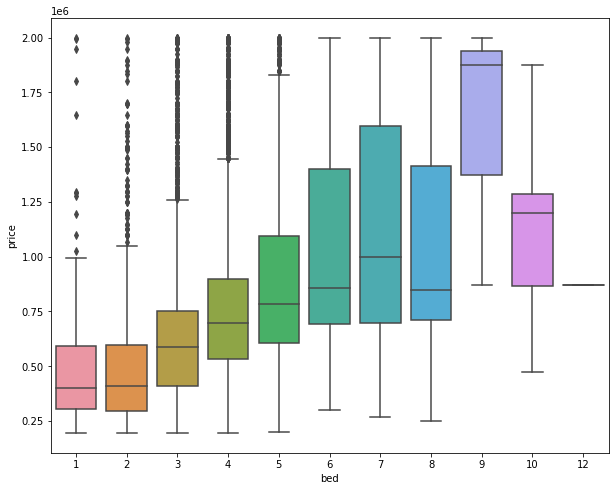

In [13]:
# feature like number of bedroom or bathroom
plt.figure(figsize = (10,8))
sns.boxplot(x = 'bed',y = 'price', data = full_data)

In [14]:
full_data = full_data.drop(columns=['price', 'n_citi','street','image_id',], axis=1)


In [15]:
full_data

,citi,bed,bath,sqft
0,"Salton City, CA",3,2.0,1560
1,"Brawley, CA",3,2.0,713
2,"Imperial, CA",3,1.0,800
3,"Brawley, CA",3,1.0,1082
4,"Calexico, CA",4,3.0,2547
...,...,...,...,...
15469,"Moorpark, CA",5,4.1,4092
15470,"Thousand Oaks, CA",5,3.0,2773
15471,"Santa Paula, CA",3,2.0,1576
15472,"Oak View, CA",4,2.0,2086


In [16]:
# Split data
xtrain, xtest, ytrain, ytest = train_test_split(full_data, y, test_size=0.2, random_state=random_state)

In [17]:
print(full_data.shape)
print(xtrain.shape)
print(xtest.shape)


(15471, 4)
(12376, 4)
(3095, 4)


In [18]:
categorical_features1 = ['citi']
numeric_features = ['bed', 'bath','sqft']

In [19]:
from sklearn.linear_model import QuantileRegressor

#setup steps of the transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer1 = Pipeline(steps=[
    ('ohe',OneHotEncoder())])

categorical_transformer2 = Pipeline(steps=[
    ('te',TargetEncoder())])

categorical_transformer3 = Pipeline(steps=[
    ('bin',BinaryEncoder())])

#setup the column transformer for preprocessing step in the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num1', numeric_transformer, numeric_features),
        ('cat1', categorical_transformer1, categorical_features1),
    ])

#Set parameters and prepare grid search
param_grid = {
    'preprocessor__cat1__ohe__handle_unknown':['ignore'],
    'classifier__n_jobs':[1]
}
#Setup the pipeline steps
gs = Pipeline(steps=[('preprocessor', preprocessor),
                    ('classifier', LinearRegression())])

In [20]:
CV = 10

from sklearn.metrics import make_scorer

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


MAPE_custom_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

gs_rmse = GridSearchCV(gs, param_grid, scoring = MAPE_custom_scorer, cv=CV, verbose=3)

In [21]:
gs_rmse.fit(xtrain,ytrain)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10] END classifier__n_jobs=1, preprocessor__cat1__ohe__handle_unknown=ignore;, score=-21.995 total time=   0.2s
[CV 2/10] END classifier__n_jobs=1, preprocessor__cat1__ohe__handle_unknown=ignore;, score=-21.648 total time=   0.1s
[CV 3/10] END classifier__n_jobs=1, preprocessor__cat1__ohe__handle_unknown=ignore;, score=-21.626 total time=   0.1s
[CV 4/10] END classifier__n_jobs=1, preprocessor__cat1__ohe__handle_unknown=ignore;, score=-21.328 total time=   0.1s
[CV 5/10] END classifier__n_jobs=1, preprocessor__cat1__ohe__handle_unknown=ignore;, score=-22.937 total time=   0.1s
[CV 6/10] END classifier__n_jobs=1, preprocessor__cat1__ohe__handle_unknown=ignore;, score=-21.454 total time=   0.1s
[CV 7/10] END classifier__n_jobs=1, preprocessor__cat1__ohe__handle_unknown=ignore;, score=-22.314 total time=   0.1s
[CV 8/10] END classifier__n_jobs=1, preprocessor__cat1__ohe__handle_unknown=ignore;, score=-21.877 total time=   

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num1',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['bed',
                                                                          'bath',
                                                                          'sqft']),
                                                                        ('cat1',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder())]),
                                                                         ['citi'])])),
          

In [22]:
ypred = gs_rmse.predict(xtest)
df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred})
df1 = df.head(10)
df1

,Actual,Predicted
13702,452000,5.120396e+05
5657,249999,2.633940e+05
1503,489000,5.122532e+05
4515,759900,8.172518e+05
3364,1749000,1.180248e+06
631,249000,1.553215e+05
12702,747900,9.799701e+05
12064,549000,5.190269e+05
8999,365000,2.978008e+05
12714,704900,6.991369e+05


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


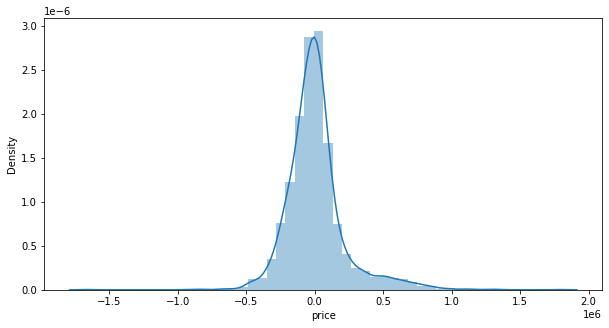

In [23]:
fig = plt.figure(figsize=(10,5))
residuals = (ytest- ypred)
sns.distplot(residuals)

In [25]:
print('Mean Absolute Percentage Error: {:.2f}'.format(mean_absolute_percentage_error(ytest, ypred))) 
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(ytest, ypred))) 
print('R2 score is: {:.2f}'.format(metrics.r2_score(ytest,ypred)))

Mean Absolute Percentage Error: 21.20
Mean Absolute Error: 143714.34
R2 score is: 0.69


In [26]:
print('Linear Regression Model:')
print("Train MAPE Score {:.2f}".format(-gs_rmse.score(xtrain,ytrain)))
print("Test MAPE Score {:.2f}".format(-gs_rmse.score(xtest, ytest)))

Linear Regression Model:
Train MAPE Score 21.00
Test MAPE Score 21.20


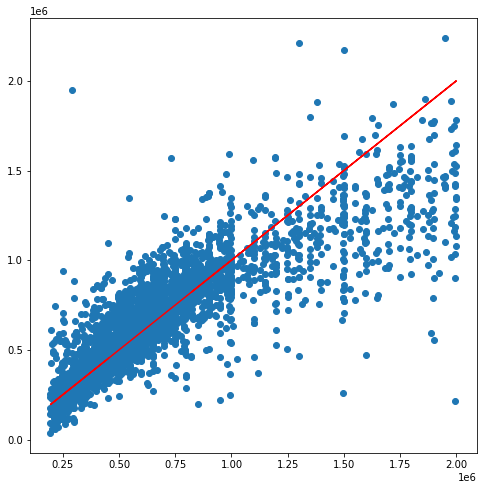

In [27]:
# Our predictions
fig, ax = plt.subplots(1,figsize=(8,8))
plt.scatter(ytest,ypred)
# Perfect predictions
plt.plot(ytest,ytest,'r')

#We see more overestimation than underestimation on the low price region and more underestimation than overestimation on the high price region
#This is due to the large intercept our model has 